In [407]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,7)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [408]:
df=pd.read_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Auto_Insurance/Data_Sets/new_cleaned_df.csv")
df.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,severity,frequincy,pure_premium
0,1060.0,0.303901,0,0,0.0,HBACK,3,F,C,2,0.0,0.0,0.0
1,1030.0,0.648871,0,0,0.0,HBACK,2,F,A,4,0.0,0.0,0.0
2,3260.0,0.569473,0,0,0.0,UTE,2,F,E,2,0.0,0.0,0.0
3,4140.0,0.317591,0,0,0.0,STNWG,2,F,D,2,0.0,0.0,0.0
4,720.0,0.648871,0,0,0.0,HBACK,4,F,C,2,0.0,0.0,0.0


In [409]:
df.drop(["clm"],axis=1,inplace=True)

In [410]:
df=df[df["claimcst0"]>0]

In [411]:
df.shape

(4624, 12)

In [412]:
df2=df.copy()

In [413]:
df2.iloc[:,:4]

,veh_value,exposure,numclaims,claimcst0
14,1660.0,0.484600,1,669.509999
16,1510.0,0.993840,1,806.609999
17,760.0,0.539357,1,401.805451
40,1890.0,0.654346,2,1811.709997
64,4060.0,0.851472,1,5434.439987
...,...,...,...,...
67815,1360.0,0.832307,1,1415.099999
67846,2820.0,0.854209,1,2807.929993
67847,730.0,0.933607,1,8125.459991
67849,1980.0,0.681725,1,2473.969994


In [414]:
df3=df2.iloc[:,:4].copy()

In [415]:
x=df3.values

In [418]:
from sklearn.cluster import KMeans
wscc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wscc.append(kmeans.inertia_)

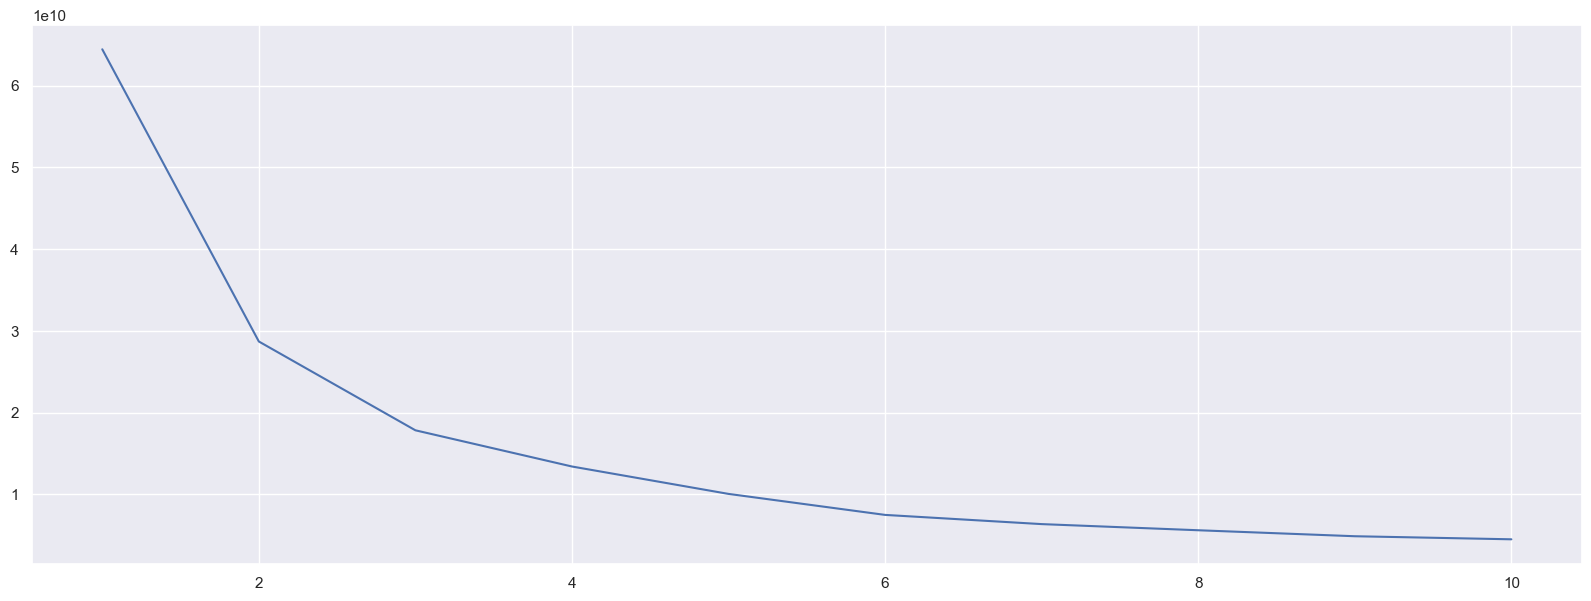

In [419]:
plt.plot(range(1,11),wscc)

* *3 clusters is  the best number of clusters*

In [420]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42)
y_kmean=kmeans.fit_predict(x)
np.unique(y_kmean)

array([0, 1, 2], dtype=int32)

In [421]:
new_df2=pd.concat([df3.reset_index(),pd.DataFrame(y_kmean,columns=["cluster_number"])],axis=1).drop("index",axis=1)

In [422]:
new_df2.head()

,veh_value,exposure,numclaims,claimcst0,cluster_number
0,1660.0,0.484600,1,669.509999,0
1,1510.0,0.993840,1,806.609999,0
2,760.0,0.539357,1,401.805451,0
3,1890.0,0.654346,2,1811.709997,0
4,4060.0,0.851472,1,5434.439987,2


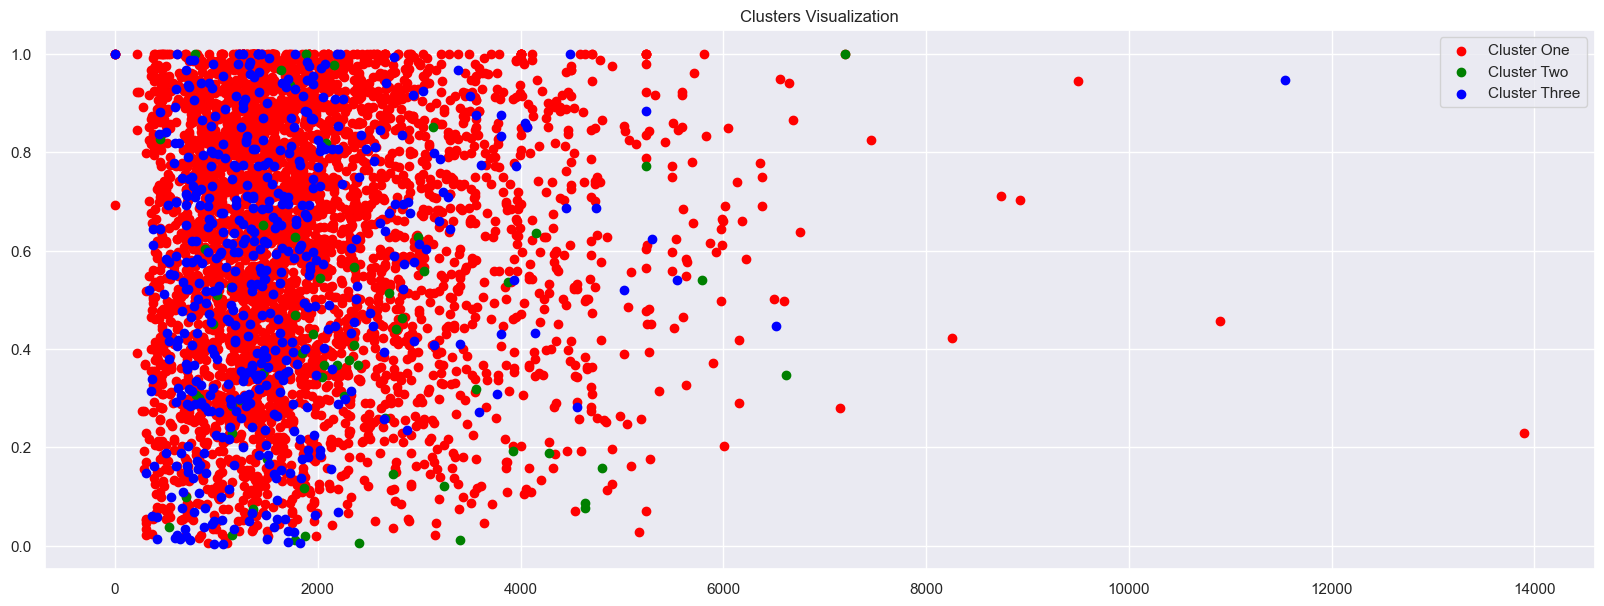

In [429]:
plt.scatter(x[y_kmean==0,0],x[y_kmean==0,1],c="red")
plt.scatter(x[y_kmean==1,0],x[y_kmean==1,1],c="green")
plt.scatter(x[y_kmean==2,0],x[y_kmean==2,1],c="blue")
plt.title("Clusters Visualization")
plt.legend(["Cluster One","Cluster Two","Cluster Three"])

In [432]:
new_df2.groupby("cluster_number")["cluster_number"].value_counts()

cluster_number
0    4066
1      63
2     495
Name: count, dtype: int64

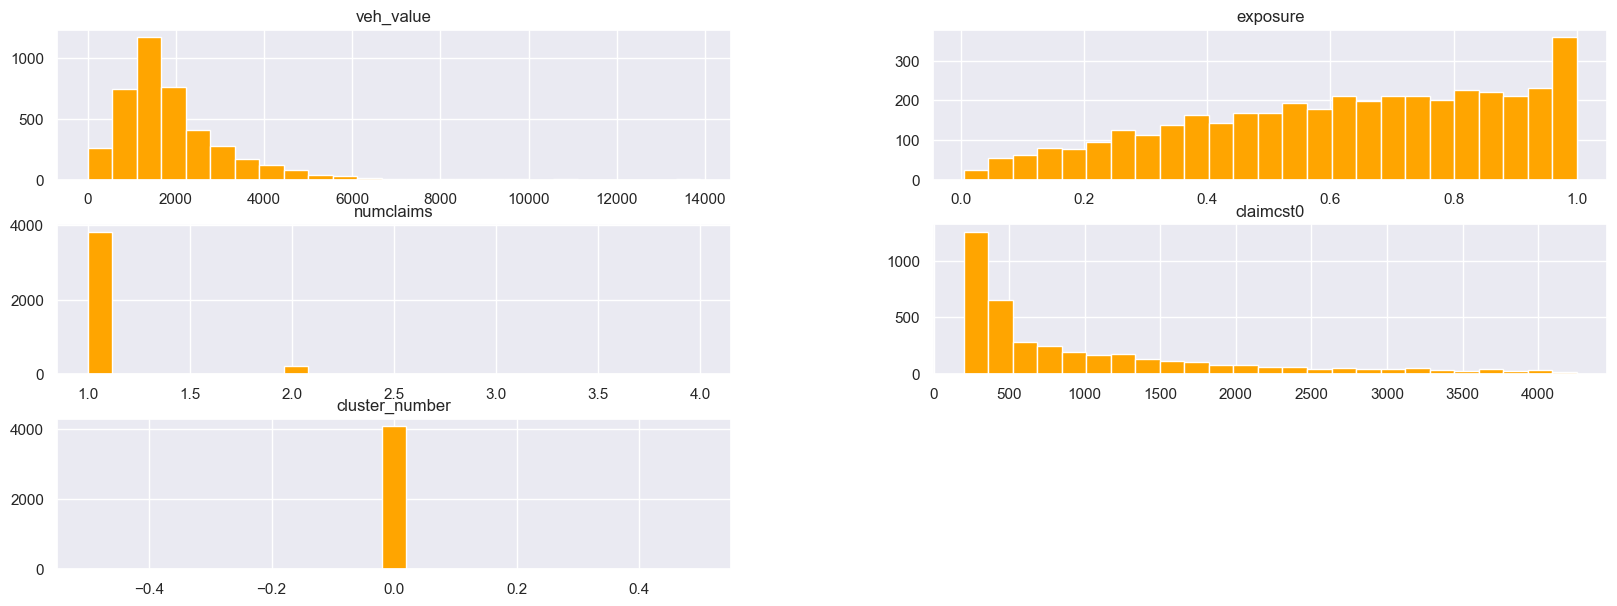

In [447]:
new_df2[new_df2["cluster_number"]==0].hist(color="orange",bins=25)
plt.show()

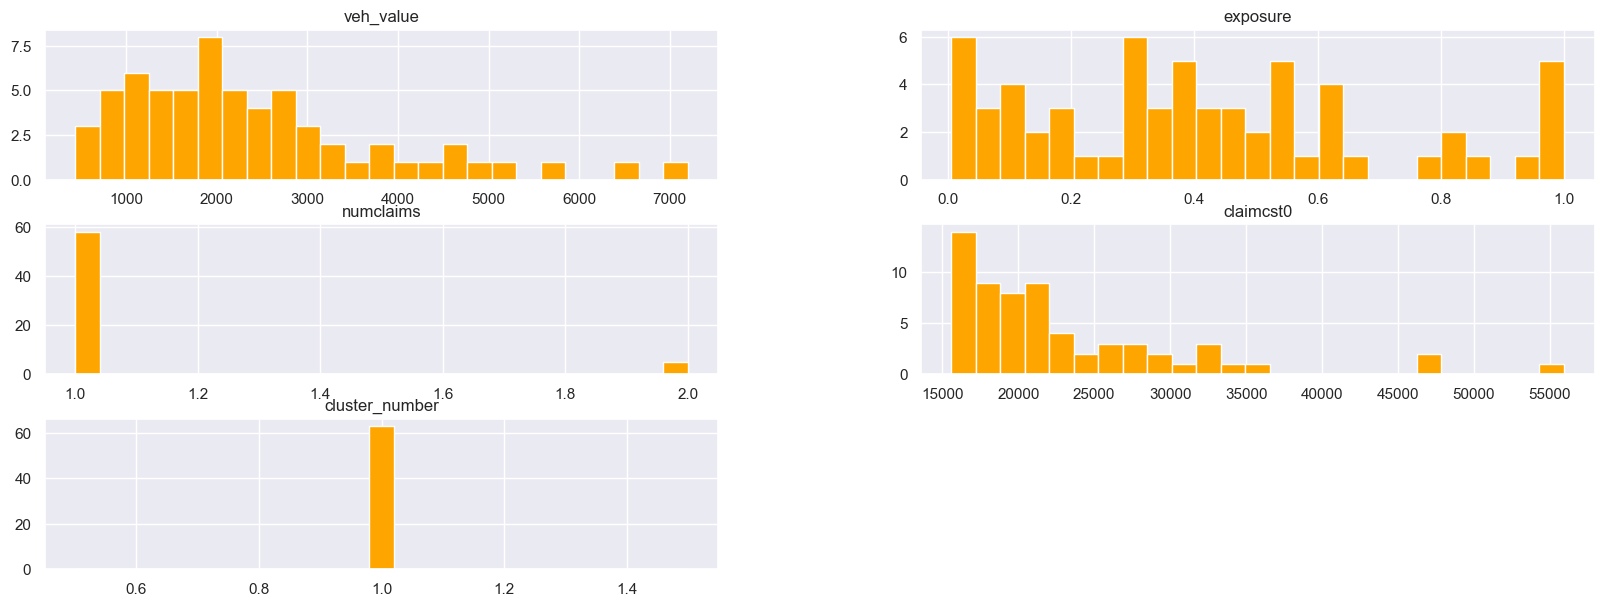

In [338]:
new_df2[new_df2["cluster_number"]==1].hist(color="orange",bins=25)
plt.show()

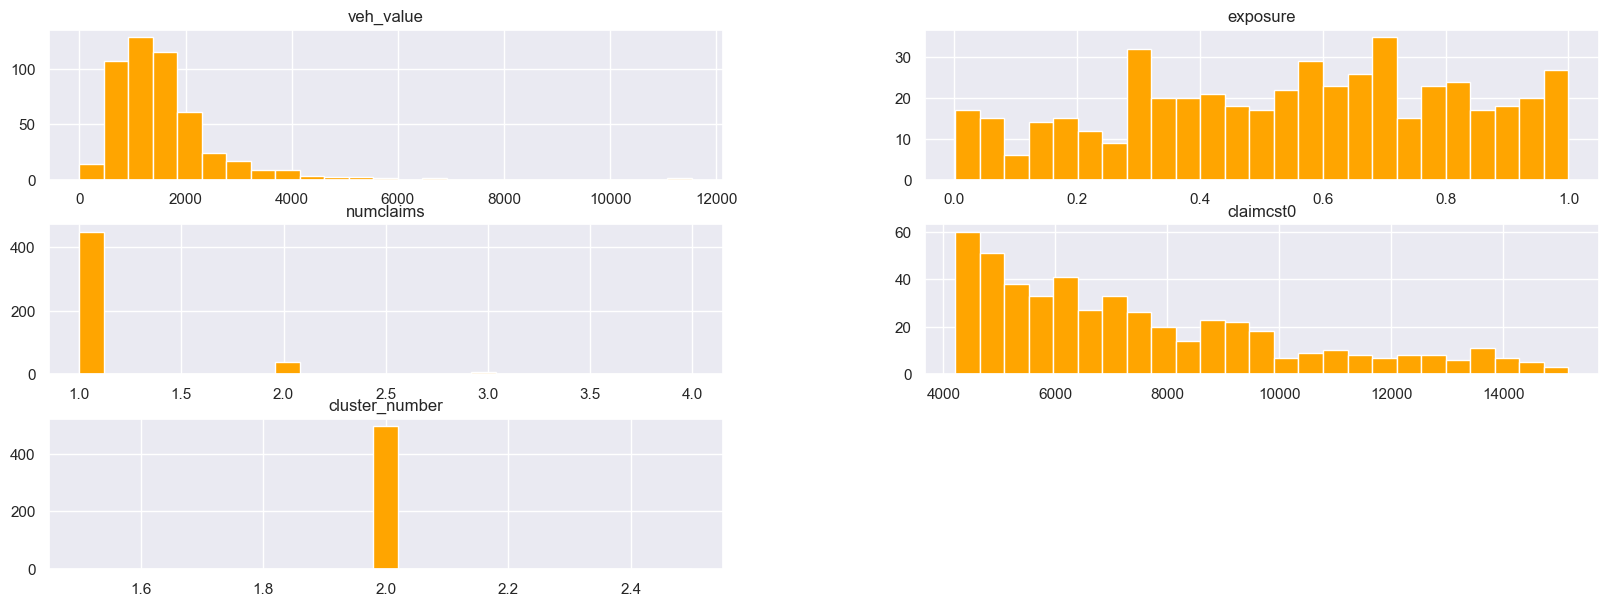

In [446]:
new_df2[new_df2["cluster_number"]==2].hist(color="orange",bins=25)
plt.show()

> ### *We can see that : <br>1. Cluster One has 4066 obsevation <br> 2.Cluster Two has 63 observations <br> 3. Cluster Three has 465 observation <br> 4.Cluster 2 has the hieghest claims cost and the hihghest vehicle values*